In [13]:
from matplotlib import pyplot as plt
import geopandas
import numpy as np
from sklearn.neighbors import NearestNeighbors

/var/folders/rl/v2_zkbjs33x0p23qv62f8r4r0000gn/T/ipykernel_5938/753689729.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
/var/folders/rl/v2_zkbjs33x0p23qv62f8r4r0000gn/T/ipykernel_5938/753689729.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


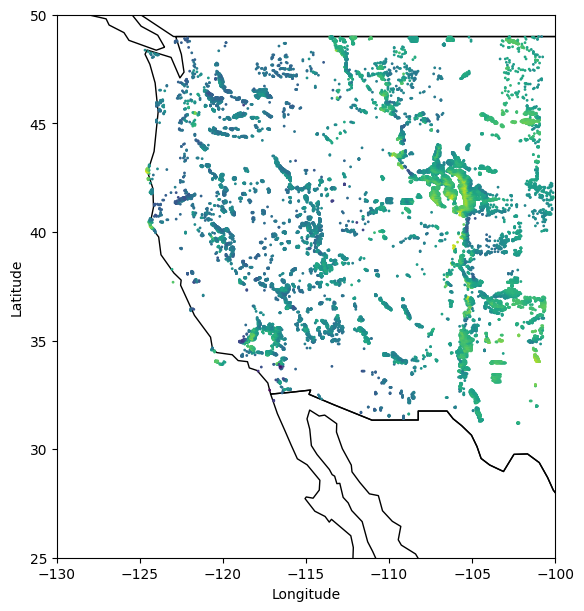

In [8]:
fig,ax = plt.subplots(figsize=(8,6), constrained_layout=True)

# world map
world_gdf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_gdf = world_gdf[world_gdf['continent'] == 'North America']

world_gdf.plot(ax=ax, facecolor=[0,0,0,0], edgecolor='k')

gdf = geopandas.read_file('Western_Wind_Dataset')

gdf.plot(column='CAPACITY F', ax=ax, s=1)

ax.set(xlabel='Longitude', ylabel='Latitude', xlim=[-130,-100], ylim=[25, 50])
ax.set()
# fig.savefig("wind_thingy.png")
fig.show()

In [9]:
gdf.head()

,CAPACITY F,geometry
0,30.828125,POINT (-102.25000 31.18750)
1,31.234375,POINT (-102.25000 31.18750)
2,32.031250,POINT (-102.18750 31.18750)
3,29.984375,POINT (-102.25000 31.20312)
4,29.312500,POINT (-102.25000 31.20312)


In [10]:
gdf_crs = gdf.to_crs("EPSG:4326")
gdf_arr = np.array(gdf_crs.drop(columns=['geometry']))

In [11]:
gdf_arr

array([[30.828125],
       [31.234375],
       [32.03125 ],
       ...,
       [32.75    ],
       [32.875   ],
       [32.5625  ]])

In [14]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(gdf_arr)
distances, indices = nbrs.kneighbors(gdf_arr)

In [17]:
nbrs.kneighbors_graph(gdf_arr).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])